In [ ]:
import numpy as np
import os
import tensorflow as tf
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [ ]:
bad_frames = '/content/drive/MyDrive/noisy images'

In [ ]:
noisy_frames = []
for file in tqdm(sorted(os.listdir(bad_frames))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(bad_frames + '/' + file, target_size=(256,256))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    noisy_frames.append(image)

noisy_frames = np.array(noisy_frames)

  0%|          | 0/51 [00:00<?, ?it/s]

In [ ]:
print(noisy_frames.shape)

(51, 256, 256, 3)


In [ ]:
good_frames = '/content/drive/MyDrive/clean images'

In [ ]:
clean_frames = []
for file in tqdm(sorted(os.listdir(good_frames))):
  if any(extension in file for extension in ['.jpg', 'jpeg', '.png']):
    image = tf.keras.preprocessing.image.load_img(good_frames + '/' + file, target_size=(256,256))
    image = tf.keras.preprocessing.image.img_to_array(image).astype('float32') / 255
    clean_frames.append(image)

clean_frames = np.array(clean_frames)

  0%|          | 0/51 [00:00<?, ?it/s]

In [ ]:
print(clean_frames.shape)

(51, 256, 256, 3)


In [ ]:
round(len(noisy_frames)*0.8)

41

In [ ]:
noisy_train = noisy_frames[0:round(len(noisy_frames)*0.8)]
noisy_test = noisy_frames[round(len(noisy_frames)*0.8):]

clean_train = clean_frames[0:round(len(clean_frames)*0.8)]
clean_test = clean_frames[round(len(clean_frames)*0.8):]

In [ ]:
autoencoder = tf.keras.models.Sequential()
#Layer 1
autoencoder.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', input_shape = (256,256,3)))
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 3
autoencoder.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 4
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 5
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 6
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 7
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 8
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 32, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 9
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 64, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 11
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 3, kernel_size = (3,3), activation = 'sigmoid', padding = 'same'))

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      18464     
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 16)      4624      
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 16)      6

In [ ]:
autoencoder.compile(metrics= ['accuracy'], loss='mean_squared_error', optimizer='adam')

In [ ]:
history = autoencoder.fit(noisy_train, clean_train, epochs=100, batch_size=2, validation_split=0.1)

Epoch 1/100
18/18 [==============================] - 41s 2s/step - loss: 0.0253 - accuracy: 0.3226 - val_loss: 0.0678 - val_accuracy: 0.9248
Epoch 2/100
18/18 [==============================] - 39s 2s/step - loss: 0.0089 - accuracy: 0.3161 - val_loss: 0.0627 - val_accuracy: 0.8331
Epoch 3/100
18/18 [==============================] - 39s 2s/step - loss: 0.0103 - accuracy: 0.2826 - val_loss: 0.0619 - val_accuracy: 0.9849
Epoch 4/100
18/18 [==============================] - 39s 2s/step - loss: 0.0067 - accuracy: 0.3243 - val_loss: 0.0552 - val_accuracy: 0.7393
Epoch 5/100
18/18 [==============================] - 39s 2s/step - loss: 0.0074 - accuracy: 0.3010 - val_loss: 0.0512 - val_accuracy: 0.9911
Epoch 6/100
18/18 [==============================] - 39s 2s/step - loss: 0.0089 - accuracy: 0.2627 - val_loss: 0.0498 - val_accuracy: 0.9816
Epoch 7/100
18/18 [==============================] - 39s 2s/step - loss: 0.0089 - accuracy: 0.3262 - val_loss: 0.0504 - val_accuracy: 0.8460
Epoch 8/100
1

In [ ]:
print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy \t', history.history['accuracy'][-1])
print('Final Validation loss \t', history.history['val_loss'][-1])
print('Final validation accuracy \t', history.history['val_accuracy'][-1])

Final training loss 	 0.0016387954819947481
Final training accuracy 	 0.3048197329044342
Final Validation loss 	 0.0007795967976562679
Final validation accuracy 	 0.257730096578598


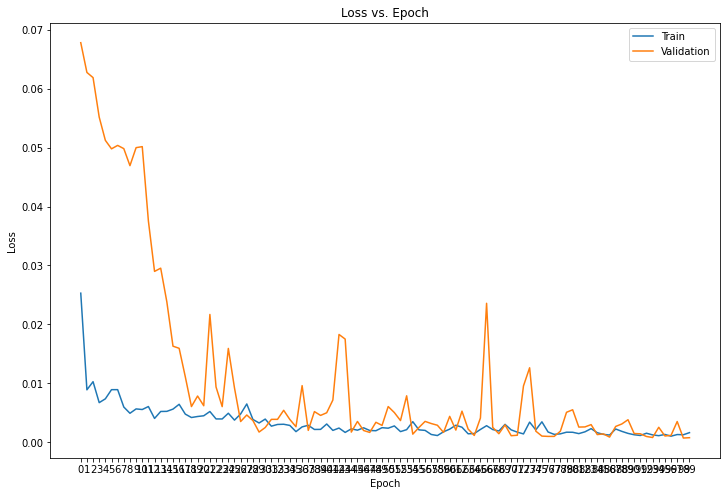

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Validation'])
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(ticks=history.epoch, labels=history.epoch)
plt.show()

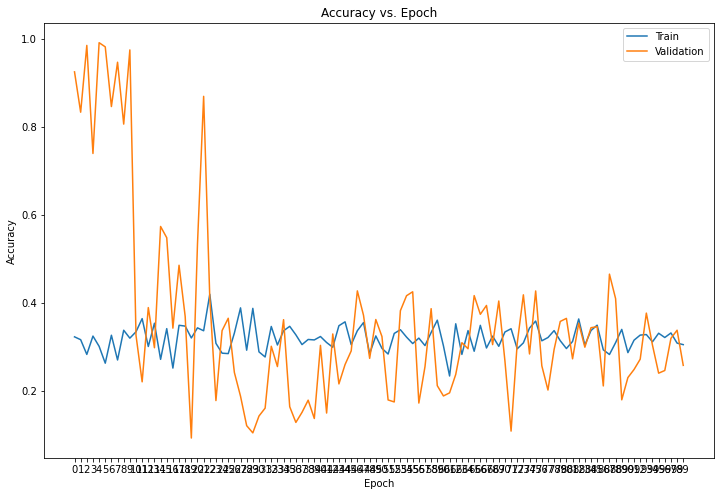

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Validation'])
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(ticks=history.epoch, labels=history.epoch)
plt.show()

In [ ]:
results = autoencoder.predict(noisy_test)

In [ ]:
image = np.random.randint(0, len(noisy_test))

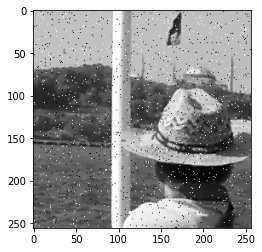

In [ ]:
plt.imshow(noisy_test[image])
plt.show()

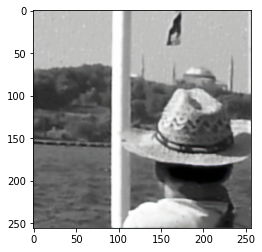

In [ ]:
plt.imshow(results[image])
plt.show()

This is the model result


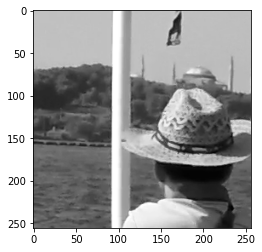

In [ ]:
plt.imshow(clean_test[image])
plt.show()

This is the ground reality

In [ ]:
tf.keras.callbacks.ModelCheckpoint

tensorflow.python.keras.callbacks.ModelCheckpoint

In [ ]:
from skimage.metrics import peak_signal_noise_ratio

predicted_images = results
psnr_original_mean = 0
psnr_prediction_mean = 0

for gt_img, noisy_img, predicted_img in zip(clean_test, noisy_test, predicted_images):
    psnr_original_mean += peak_signal_noise_ratio(gt_img, noisy_img)
    psnr_prediction_mean += peak_signal_noise_ratio(gt_img, predicted_img)

psnr_original_mean/=clean_test.shape[0]
psnr_prediction_mean/=clean_test.shape[0]
print("Original average gt-noisy PSNR ->", psnr_original_mean)
print("Predicted average gt-predicted PSNR ->", psnr_prediction_mean)

Original average gt-noisy PSNR -> 20.595729088609673
Predicted average gt-predicted PSNR -> 33.1486099907711


In [ ]:
from skimage.metrics import structural_similarity as ssim

predicted_images = results
ssim_original_mean = 0
ssim_prediction_mean = 0

for gt_img, noisy_img, predicted_img in zip(clean_test, noisy_test, predicted_images):
    ssim_original_mean += ssim(gt_img, noisy_img, multichannel=True, data_range=noisy_img.max() - noisy_img.min())
    ssim_prediction_mean += ssim(gt_img, predicted_img, multichannel=True, data_range=predicted_img.max() - predicted_img.min())

ssim_original_mean/=clean_test.shape[0]
ssim_prediction_mean/=clean_test.shape[0]
print("Original average gt-noisy SSIM ->", ssim_original_mean)
print("Predicted average gt-predicted SSIM ->", ssim_prediction_mean)

Original average gt-noisy SSIM -> 0.48512837815131543
Predicted average gt-predicted SSIM -> 0.929101473550164
